### **Memperbarui parsing XML**

In [7]:
import xml.etree.ElementTree as ET
import numpy as np
import os

def parse_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    labels = []
    classes = []
    
    for kanji_data in root.findall('Kanji_data'):
        kanji = kanji_data.find('Kanji').text
        kanji_class = kanji_data.find('Kanji_Classification').text
        
        labels.append(kanji)
        classes.append(kanji_class)
    
    return np.array(labels), np.array(classes)

# Misalkan dataset berada di folder 'data' dan file XML bernama 'kanji_dataset.xml'
labels, classes = parse_xml('Kanji.xml')

# Verifikasi hasil parsing
print(f'Jumlah label: {len(labels)}')
print(f'Jumlah kelas: {len(classes)}')
print(f'Sample label: {labels[:5]}')
print(f'Sample kelas: {classes[:5]}')

Jumlah label: 2136
Jumlah kelas: 2136
Sample label: ['一' '丁' '七' '万' '丈']
Sample kelas: ['指事 Ideographic' '象形 Pictographic' '仮借 Loan' '象形 Pictographic'
 '会意 Com. Ideographic']


### **Membuat data dummy untuk gambar**

In [8]:
# Membuat data dummy untuk gambar (64x64 grayscale)
image_size = 64
num_samples = len(labels)
images = np.random.rand(num_samples, image_size, image_size, 1).astype('float32')

# Verifikasi data dummy gambar
print(f'Jumlah gambar: {len(images)}')
print(f'Ukuran gambar: {images[0].shape}')

Jumlah gambar: 2136
Ukuran gambar: (64, 64, 1)


### **Pre-processing data**

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Encode classes (kategori)
class_encoder = LabelEncoder()
classes_encoded = class_encoder.fit_transform(classes)

# Menggabungkan labels dan classes encoded ke dalam satu array
combined_labels = np.stack((labels_encoded, classes_encoded), axis=1)

# One-hot encoding untuk labels dan classes
labels_one_hot = to_categorical(labels_encoded)
classes_one_hot = to_categorical(classes_encoded)

# Bagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.2, random_state=42)

# Verifikasi bentuk data
print(f'Bentuk X_train: {X_train.shape}')
print(f'Bentuk y_train: {y_train.shape}')
print(f'Bentuk X_test: {X_test.shape}')
print(f'Bentuk y_test: {y_test.shape}')

Bentuk X_train: (1708, 64, 64, 1)
Bentuk y_train: (1708, 2136)
Bentuk X_test: (428, 64, 64, 1)
Bentuk y_test: (428, 2136)


### **Membuat dan Melatih Model CNN**

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Membuat model CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

/home/user/kanjitofurigana/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.0000e+00 - loss: 7.6728 - val_accuracy: 0.0000e+00 - val_loss: 7.6829
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.0016 - loss: 7.6550 - val_accuracy: 0.0000e+00 - val_loss: 7.7356
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 9.0226e-04 - loss: 7.6026 - val_accuracy: 0.0000e+00 - val_loss: 7.8893
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.0000e+00 - loss: 7.5195 - val_accuracy: 0.0000e+00 - val_loss: 8.3511
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.0000e+00 - loss: 7.4721 - val_accuracy: 0.0000e+00 - val_loss: 8.6813
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - accuracy: 0.0023 - loss: 7.4234 - val_accuracy: 0.0000e+00 - val_loss: 8.9397
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 184ms/step - accuracy: 0.0019 - loss: 7.3666 - val_accuracy: 0.0000e+00 - val_loss: 8.8387
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - a

### **Evaluasi Model**

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.0000e+00 - loss: 9.6552
Test accuracy: 0.00


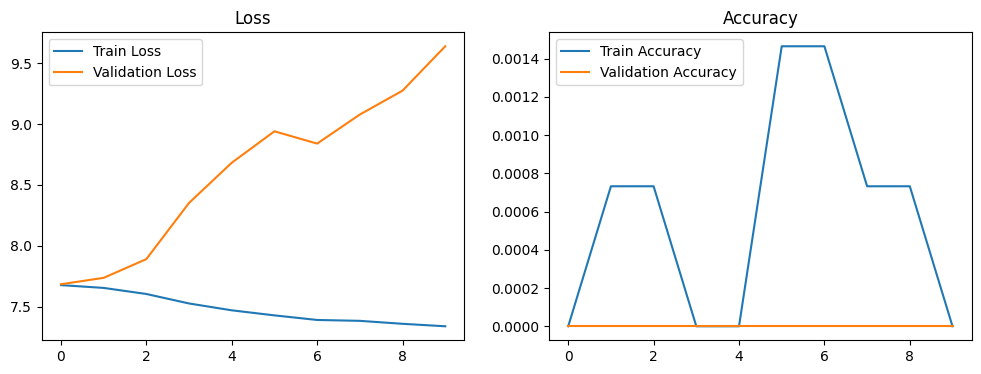

In [11]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.2f}')

# Plotting training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

### **Menyimpan Model**

In [12]:
model.save('kanji_classifier_model.h5')